# Investigating trends in abstracts and keywords

I collected 1,000 records from Web of Science related to conservation and biodiversity. I want to explore how to quickly identify topics within the sample with the eventual goal of mapping these topics across a world map.

In [2]:

import pandas as pd

data=pd.read_csv("Dataset for Class.csv",
                 usecols=['Article Title','Source Title','Author Keywords','Abstract','Addresses','Times Cited, All Databases'])
print(data)

                                         Article Title  \
0    Land enrolled in the Conservation Reserve Prog...   
1    Fish Biodiversity Conservation and Restoration...   
2    Operationalizing ecological connectivity in sp...   
3    Spatial conservation planning with ecological ...   
4    A landscape index of ecological integrity to i...   
..                                                 ...   
995            Disturbance Ecology in the Anthropocene   
996  Integrating socio-ecological dynamics into lan...   
997  Persistence through tough times: fixed and shi...   
998  Can local ecological knowledge provide meaning...   
999  Shifts in habitat suitability and the conserva...   

                           Source Title  \
0       GLOBAL ECOLOGY AND CONSERVATION   
1                                 WATER   
2      METHODS IN ECOLOGY AND EVOLUTION   
3               BIOLOGICAL CONSERVATION   
4                     LANDSCAPE ECOLOGY   
..                                  ...   
99

Now, I'm just going to look at the most common tokens in keywords, abstracts, and titles

In [3]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist

#for text wrapping
import textwrap

import matplotlib.pyplot as plt

import numpy as np
import scipy

sw = stopwords.words("english")

In [4]:
data['Author Keywords']

0      Conservation Reserve Program; Discrete choice ...
1      conservation; ecological integrity; fish biodi...
2      decision support software; demographic; ecolog...
3      Conservation feedbacks; Dynamic spatial priori...
4      Landscape pattern; Landscape metrics; Ecologic...
                             ...                        
995    anthropogenic change; disturbance ecology; dis...
996    Tree farms; Socio-Ecological; Dyna-CLUE; InVES...
997    Endangered species; Biodiversity conservation;...
998    Hainan; Indo-Pacific humpback dolphin; Questio...
999    Andes; conservation planning; climate change; ...
Name: Author Keywords, Length: 1000, dtype: object

# Most Common Author Keywords
    

In [5]:
keywords=data['Author Keywords'] ##saving just the keywords column

In [6]:
word_dat=[] ##creating a list to store string of data

for item in keywords:  #Make everything in the column  a string of text
    string=str(item)
    word_dat.append(string)
    
len(word_dat)
#word_dat[1:3]

1000

In [7]:
tokens=nltk.word_tokenize(str(word_dat)) ##tokenize all of the text strings
len(tokens) #How many tokens are there??
#19,176 tokens

19176

In [8]:
cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase


In [9]:
len(cleaned_tokens) #Now we are at 10,019 tokens
cleaned_tokens[1:15]

['program',
 'discrete',
 'choice',
 'model',
 'lesser',
 'movement',
 'ecology',
 'nocturnal',
 'ecology',
 'roost',
 'sites',
 'tympanuchus',
 'pallidicinctus',
 'ecological']

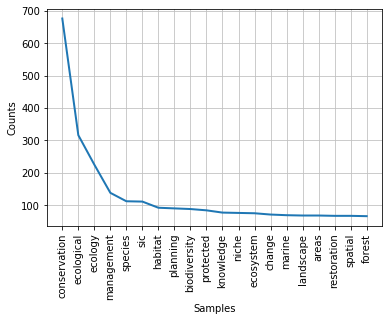

In [10]:
#Visualizing the most common keywords

fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)


# Most common words in abstracts

In [6]:
abstract=data['Abstract']

word_dat=[] ##creating a list to store string of data

for item in abstract:  #Make everything in the column  a string of text
    string=str(item)
    word_dat.append(string)
    
len(word_dat)   
word_dat[1]

'Although many significant policies and legislation have been put forth by the Chinese government aiming toward ecological civilization for the aquatic environment, in practice, the situation is still undesirable. A pioneering multi-year study has since been conducted on the East Tiaoxi River (a major tributary of the renowned Yangtze River), focusing on fish distribution, influencing factors and habitat requirements, and river health as well. This revealed certain key species, hotspot protection areas, negative impacts of local anthropogenic activities, and inappropriate perceptions and practices of conservation and restoration. We found that not all fish species were equally conserved and that the supposedly ecological engineering measures were initiated without regard for ecological integrity. Our exemplary study appreciates scientific basis and truly ecological notion, and urgently advocates comprehensive and continuous basin-scale scientific investigation of fish biodiversity, and

In [12]:
tokens=nltk.word_tokenize(str(word_dat)) ##tokenize all of the text strings
len(tokens)

#There are currently 269,378 tokens

cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase


In [13]:
len(cleaned_tokens)
##there are now 148,105 tokens
cleaned_tokens[1:20]

['animals',
 'must',
 'select',
 'sites',
 'rest',
 'may',
 'spend',
 'large',
 'portion',
 'lives',
 'despite',
 'importance',
 'period',
 'daily',
 'activity',
 'budget',
 'lack',
 'information',
 'ecology']

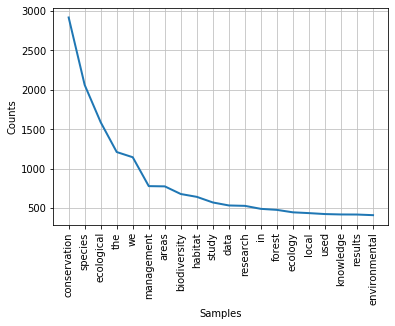

In [15]:
fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)

## Removing words that appear with very large frequency and very low frequency
There are a lot of words that have a high frequency given we only have 1,000 abstracts. I want to see what will happen with topic models with every word in the model and with high frequency words removed. I want to see what makes abstracts unique. Therefore, I want to try removing words that appear more than 1,000 times and less than 10 times.

In [14]:
# using Counter() + list comprehension

removed=[]
upper=1000
lower=10

freq=Counter(cleaned_tokens)
freq

filtered_tokens= [ele for ele in cleaned_tokens if freq[ele] < upper]
filtered2_tokens= [ele for ele in filtered_tokens if freq[ele] > lower]
#Counter(filtered2_tokens)

In [15]:
#removed words
removed=[ele for ele in cleaned_tokens if freq[ele] > upper]
removed.append([ele for ele in cleaned_tokens if freq[ele] < lower])

In [16]:
#removed

## Looking at common bigrams (pairs of words)

In [6]:
from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
bigrams=[]

for abstract in word_dat:
    tokens = word_tokenize(abstract)
    tokens = [t for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    bi_grams = list(ngrams(tokens, 2))
    
    
    bigrams.append(bi_grams)

len(bigrams)
#bigrams ##currently bigrams is a list of lists of bigrams

1000

In [18]:
# how to flatten list of lists
 
# using list comprehension
all_bigrams = [item for sublist in bigrams for item in sublist]
all_bigrams

# counting all bigrams
counter = Counter(all_bigrams)
counter.most_common(30)
#counter

[(('protected', 'area'), 215),
 (('biodiversity', 'conservation'), 163),
 (('climate', 'change'), 163),
 (('ecosystem', 'service'), 145),
 (('The', 'result'), 122),
 (('conservation', 'planning'), 97),
 (('This', 'study'), 96),
 (('conservation', 'management'), 90),
 (('case', 'study'), 89),
 (('We', 'found'), 88),
 (('Our', 'result'), 87),
 (('ecological', 'conservation'), 78),
 (('conservation', 'strategy'), 77),
 (('We', 'used'), 76),
 (('ecological', 'niche'), 75),
 (('land', 'use'), 73),
 (('conservation', 'effort'), 71),
 (('ecological', 'knowledge'), 69),
 (('conservation', 'status'), 69),
 (('specie', 'richness'), 66),
 (('water', 'conservation'), 65),
 (('Published', 'Elsevier'), 64),
 (('conservation', 'action'), 63),
 (('In', 'addition'), 62),
 (('human', 'activity'), 60),
 (('We', 'also'), 59),
 (('natural', 'resource'), 59),
 (('In', 'study'), 57),
 (('study', 'area'), 57),
 (('conservation', 'area'), 56)]

In [19]:
len(all_bigrams)

147693

In [21]:
##Removing some irrelevant bigrams

bad_bigrams=[('We', 'also'), ('In', 'study'),('In', 'addition'),('We', 'used'),('Published', 'Elsevier'),
('Our', 'result'),('We', 'found'),('The', 'result'),('This', 'study')]

clean_bigrams = []
for bigram in all_bigrams:
    if bigram not in bad_bigrams:
        clean_bigrams.append(bigram)

# Creating World Cloud Visualizations

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

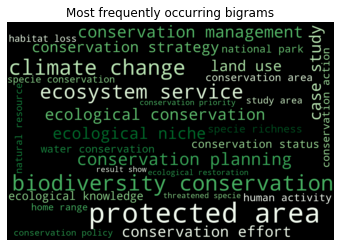

In [29]:

dictionary2 = [' '.join(tup) for tup in clean_bigrams]
#print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 30
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,colormap='Greens') #,stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_bigram.jpg')

# Looking at trigrams


In [30]:
trigrams=[]

for abstract in word_dat:
    tokens = word_tokenize(abstract)
    tokens = [t for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    tri_grams = list(ngrams(tokens, 3))
    
    
    trigrams.append(tri_grams)

len(trigrams)
#bigrams ##currently trigrams is a list of lists of trigrams

1000

In [31]:
# flatten list of lists
 
# using list comprehension
all_trigrams = [item for sublist in trigrams for item in sublist]
all_trigrams

# counting all bigrams
counter = Counter(all_trigrams)
counter.most_common(30)
#counter

[(('The', 'Authors', 'Published'), 34),
 (('Authors', 'Published', 'Elsevier'), 34),
 (('The', 'result', 'show'), 29),
 (('C', 'The', 'Authors'), 27),
 (('local', 'ecological', 'knowledge'), 24),
 (('ecological', 'niche', 'model'), 22),
 (('home', 'range', 'size'), 20),
 (('soil', 'water', 'conservation'), 20),
 (('marine', 'protected', 'area'), 20),
 (('All', 'right', 'reserved'), 19),
 (('IUCN', 'Red', 'List'), 18),
 (('natural', 'resource', 'management'), 18),
 (('traditional', 'ecological', 'knowledge'), 17),
 (('Elsevier', 'All', 'right'), 16),
 (('The', 'result', 'showed'), 16),
 (('priority', 'conservation', 'area'), 15),
 (('specie', 'conservation', 'concern'), 14),
 (('C', 'Elsevier', 'All'), 14),
 (('play', 'important', 'role'), 14),
 (('Our', 'result', 'show'), 14),
 (('Our', 'result', 'suggest'), 14),
 (('The', 'result', 'study'), 14),
 (('Brasileira', 'de', 'Ciencia'), 13),
 (('de', 'Ciencia', 'Ecologica'), 13),
 (('Ciencia', 'Ecologica', 'e'), 13),
 (('ecological', 'niche

In [32]:
len(all_trigrams)

146696

In [35]:
bad_trigrams=[('Ciencia', 'Ecologica', 'e'),('de', 'Ciencia', 'Ecologica'),('Brasileira', 'de', 'Ciencia'),('The', 'result', 'study'),
             ('Our', 'result', 'suggest'),('Our', 'result', 'show'),('play', 'important', 'role'), ('Elsevier', 'All', 'right'),
             ('The', 'result', 'showed'),('All', 'right', 'reserved'),('C', 'The', 'Authors'),('The', 'Authors', 'Published'),
             ('Authors', 'Published', 'Elsevier'),('The', 'result', 'show')]

clean_trigrams = []
for trigram in all_trigrams:
    if trigram not in bad_trigrams:
        clean_trigrams.append(trigram)

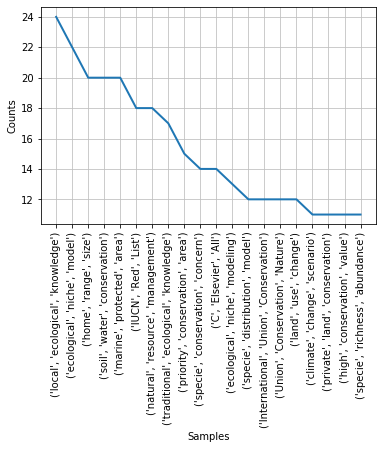

In [36]:
fdist = FreqDist(clean_trigrams)
    
    
fdist.plot(20)

In [37]:
dictionary3 = [' '.join(tup) for tup in clean_trigrams]

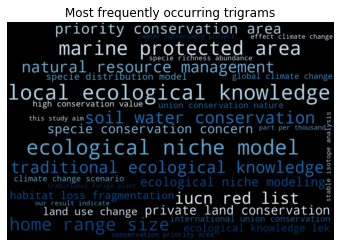

In [38]:
#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary3)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 30
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,colormap="Blues") #,stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring trigrams')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_trigram.jpg')

# How can I investigate methodology?

In [39]:
theories=[]

for trigram in clean_trigrams:
    if 'theory' in trigram:
        theories.append(trigram)
Counter(theories)

#This helps me see what theories have been mentioned in the sample of 1,000 abstracts

Counter({('resource', 'affect', 'theory'): 1,
         ('affect', 'theory', 'new'): 1,
         ('theory', 'new', 'materialism'): 1,
         ('In', 'order', 'theory'): 1,
         ('order', 'theory', 'ecological'): 1,
         ('theory', 'ecological', 'water'): 1,
         ('rational', 'coordination', 'theory'): 1,
         ('coordination', 'theory', 'paper'): 1,
         ('theory', 'paper', 'studied'): 1,
         ('hierarchical', 'organization', 'theory'): 1,
         ('organization', 'theory', 'conceptual'): 1,
         ('theory', 'conceptual', 'framework'): 1,
         ('paper', 'take', 'theory'): 1,
         ('take', 'theory', 'circular'): 1,
         ('theory', 'circular', 'economy'): 1,
         ('test', 'ecological', 'theory'): 1,
         ('ecological', 'theory', 'natural'): 1,
         ('theory', 'natural', 'ecosystem'): 1,
         ('implication', 'ecosystem', 'theory'): 1,
         ('ecosystem', 'theory', 'conservation'): 1,
         ('theory', 'conservation', 'policy'): 1

# Creating a .gif of the bigram and trigram wordcloud

In [42]:
from pathlib import Path
import imageio
image_path = Path('source_images')
images = list(image_path.glob('*.jpg'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

In [43]:
imageio.mimwrite('animated_from_images.gif', image_list, fps=1, duration=25)

In [44]:
#This created a super fast transition between the two images, but it's too fast. I changed the fps and duration to show one image eveery 25 seconds